# Comparing model's performances

In [1]:
cd /home

/home


In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import os
import re

- `astromer_clean_1e-5_alpha_1_80p`,
- `astromer_noisy_1e-5_alpha_2`,
- `astromer_noisy_1e-3_alpha_1`,
- `astromer_clean_1e-5_alpha_1_50p`,
- `astromer_clean_1e-3_alpha_1_50p`,
- `astromer_clean_1e-5_alpha_2`,
- `astromer_clean_1e-5_alpha_1_20p`,
- `astromer_noisy_1e-3_alpha_2`,
- `astromer_noisy_1e-5_alpha_1`,
- `astromer_clean_1e-5_alpha_1_10p`,
- `bugstromer_clean_1e-5_alpha_2`: ASTROMER no-mask trained on clean MACHO dataset,
- `paper`: Bugstromer trained on noisy MACHO
- `astromer_clean_1e-3_alpha_1_20p_minmax`'

In [102]:
root_exp = './presentation/experiments/astromer_0/backup/errata/'

exp_selected = ['paper', 'bugstromer_clean_1e-5_alpha_2', 'astromer_clean_1e-5_alpha_2']

In [103]:
styles = {'MLP+ATT':{'marker':'^', 'linestyle':'-'}, 
          'LSTM+ATT':{'marker':'o', 'linestyle':'--'}, 
          'Baseline':{'marker':'s', 'linestyle':':'}}
ft_names_changed = {
    'alcock': 'MACHO', 'atlas': 'ATLAS', 'ogle':'OGLE-III'
}

In [104]:
# exp = 'astromer_clean_1e-5_alpha_1_20p'
# ft_dataset = 'atlas'
# config_path = os.path.join(root_exp, 'config', exp)
# result_path = os.path.join(root_exp, 'results', exp, ft_dataset, 'classification', 'metrics.csv')
# downstream_df = pd.read_csv(result_path)
# downstream_df['sci_case'] = ['a']*downstream_df.shape[0]
# downstream_df.to_csv(result_path, index=False)

Text(0.51, -0.03, 'Samples per class')

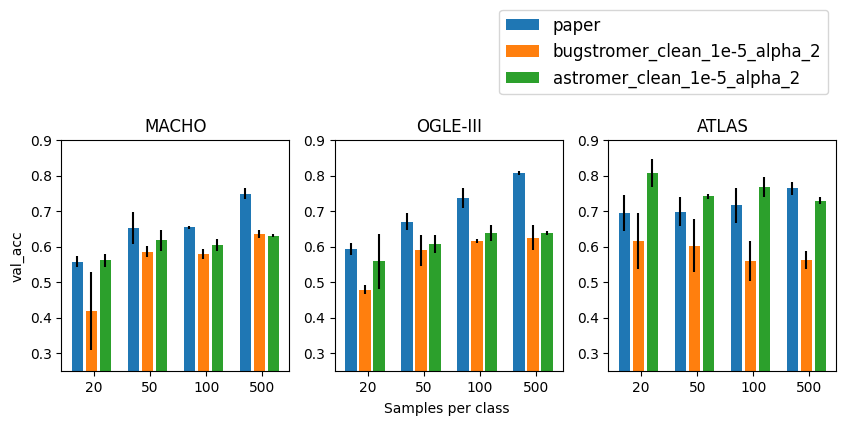

In [122]:
ft_datasets = ['alcock', 'ogle', 'atlas']

fig, axes = plt.subplots(1, len(ft_datasets), figsize=(10, 3), sharey=False)

if len(ft_datasets) == 1:
    axes = [axes]

for index, ft_dataset in enumerate(ft_datasets):
    deltas = np.linspace(-0.1*len(exp_selected), 0.2, len(exp_selected))
    
    for k, exp in enumerate(exp_selected):
        config_path = os.path.join(root_exp, 'config', exp)
        result_path = os.path.join(root_exp, 'results', exp, ft_dataset, 'classification', 'metrics.csv')

        downstream_df = pd.read_csv(result_path)

        downstream_df = downstream_df[downstream_df['model'] == 'mlp_att']
        downstream_df = downstream_df[downstream_df['sci_case'] == 'a']
        metric = 'val_acc' # 'test_f1'
        downstream_df = downstream_df[['spc', 'fold', metric]]
        
        summary = downstream_df.groupby('spc').mean().reset_index()
        summary_std = downstream_df.groupby('spc').std().reset_index()
        
        x_range = np.arange(0, summary['spc'].shape[0], 1) + deltas[k]

        axes[index].bar(x_range, summary[metric], yerr=summary_std[metric], width=0.2, label=exp)
        axes[index].set_ylim(0.25, 0.9)
        
        axes[index].set_xticks(np.arange(0, summary['spc'].shape[0], 1))
        axes[index].set_xticklabels(summary['spc'])
        axes[index].set_title(ft_names_changed[ft_dataset])

axes[-1].legend(bbox_to_anchor = (1.,1.6), fontsize=12)
axes[0].set_ylabel(metric)
fig.text(0.51, -0.03, 'Samples per class', ha='center')